# Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import jUtils
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
train = shuffle(pd.read_csv('trainBal.csv'))
validation = shuffle(pd.read_csv('validationBal.csv'))
# test = shuffle(pd.read_csv('testBal.csv'))

In [12]:
trainDown = train.sample(1000)

In [13]:
validationDown = validation.sample(1000)

In [3]:
from collections import Counter

In [4]:
print("Train:",Counter(train['label']))
print("validation:",Counter(validation['label']))

Train: Counter({0: 32675, 1: 32675})
validation: Counter({0: 25584, 1: 4119})


In [5]:
print(len(train))

65350


In [6]:
train

,Unnamed: 0,id,label,selftext,cleaned,Negative,Neutral,Positive,Compound,funct,...,wc,cleanedString,angerS,anticipation,disgust,fear,joy,sadness,surprise,trust
43596,19771,gh7wl3,0,We are physically unable to protest right now....,"['physically', 'unable', 'protest', 'right', '...",0.147,0.700,0.153,0.2908,0.534591,...,159.0,physically unable protest right covid made obv...,0.055556,0.111111,0.000000,0.111111,0.166667,0.166667,0.055556,0.333333
11745,111560,gzwxnt,0,"Didn't have to go ""hunting"" for these comments...","['didnt', 'go', 'hunting', 'comment', 'top', '...",0.136,0.812,0.052,-0.5984,0.600000,...,30.0,didnt go hunting comment top comment others ne...,0.200000,0.400000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000
40178,97967,52fmkt,0,I really fucking hate the Media...,"['really', 'fucking', 'hate', 'medium']",0.461,0.539,0.000,-0.6453,0.500000,...,6.0,really fucking hate medium,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.000000
42671,38295,21ftso,1,Sorry if I'm a little vague.,"['sorry', 'im', 'little', 'vague']",0.376,0.624,0.000,-0.1045,0.500000,...,6.0,sorry im little vague,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13162,26794,6gig0u,1,Am I the only one surprised about The_Donald c...,"['one', 'surprised', 'the_donald', 'complainin...",0.131,0.742,0.127,-0.0772,0.527778,...,72.0,one surprised the_donald complaining free spee...,0.250000,0.062500,0.062500,0.187500,0.062500,0.125000,0.187500,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15801,25627,kvcx72,1,Found out through their Twitter. The only news...,"['found', 'twitter', 'news', 'story', 'found']",0.000,1.000,0.000,0.0000,0.625000,...,16.0,found twitter news story found,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000
39506,56182,e5w35y,0,"As we saw in the Obama years, no matter how gr...","['saw', 'obama', 'year', 'matter', 'great', 'i...",0.096,0.833,0.071,0.1451,0.519231,...,52.0,saw obama year matter great idea dont bipartis...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.750000
40093,92222,4up9cg,0,**UPDATE:** r/Enough_Sanders_Spam has been cre...,"['update', 'renough_sanders_spam', 'created', ...",0.117,0.784,0.099,-0.7046,0.466292,...,178.0,update renough_sanders_spam created house es r...,0.200000,0.200000,0.066667,0.200000,0.000000,0.133333,0.000000,0.200000
28432,80817,hju1ls,0,And I mean legit examples of privatization wor...,"['mean', 'legit', 'example', 'privatization', ...",0.064,0.870,0.066,-0.2118,0.675214,...,117.0,mean legit example privatization working outli...,0.000000,0.100000,0.000000,0.100000,0.100000,0.100000,0.100000,0.500000


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [30]:
train['train'] = 1
validation['train'] = 0
X = train.append(validation)

C:\Users\darkc\AppData\Local\Temp\ipykernel_18344\2123415669.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = train.append(validation)


In [31]:
tfidf = TfidfVectorizer(strip_accents='ascii',lowercase=True,stop_words='english',max_features = 1000)
tfidfX = tfidf.fit_transform(X['cleanedString'])
tfidfDF = pd.DataFrame(tfidfX.toarray(),columns=tfidf.get_feature_names_out())

In [32]:
X =  X.reset_index()
tfidfDF['train'] = X['train']
# tfidfDF['label'] = X['label']
tfTrain = tfidfDF[tfidfDF['train'] == 1]
tfVal = tfidfDF[tfidfDF['train'] == 0]
tfVal = tfVal.drop(columns=['train'])
tfTrain = tfTrain.drop(columns=['train'])

In [14]:
trainDown['train'] = 1
validationDown['train'] = 0
X = trainDown.append(validationDown)
X =  X.reset_index()
tfidf = TfidfVectorizer(strip_accents='ascii',lowercase=True,stop_words='english',max_features = 1000)
tfidfX = tfidf.fit_transform(X['cleanedString'])
tfidfDF = pd.DataFrame(tfidfX.toarray(),columns=tfidf.get_feature_names_out())
tfidfDF['train'] = X['train']
# tfidfDF['label'] = X['label']
tfTrain = tfidfDF[tfidfDF['train'] == 1]
tfVal = tfidfDF[tfidfDF['train'] == 0]
tfVal = tfVal.drop(columns=['train'])
tfTrain = tfTrain.drop(columns=['train'])

yTrain = trainDown['label']
yVal = validationDown['label']

C:\Users\darkc\AppData\Local\Temp\ipykernel_18344\3803607947.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = trainDown.append(validationDown)


In [35]:
yTrain = train['label']
yVal = validation['label']

# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gnb = GaussianNB()
gnb.fit(tfTrain,yTrain)

GaussianNB()

In [37]:
jUtils.classThres(Y=yTrain,X=tfTrain,model=gnb)

alt.Chart(...)

In [38]:
jUtils.classThres(Y=yVal,X=tfVal,model=gnb)

alt.Chart(...)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


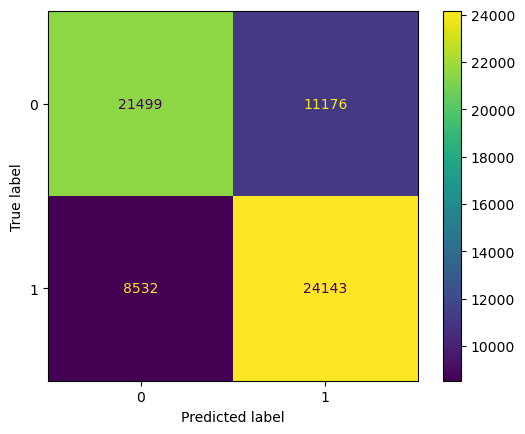

In [55]:
plot_confusion_matrix(estimator=gnb, X=tfTrain, y_true=yTrain)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


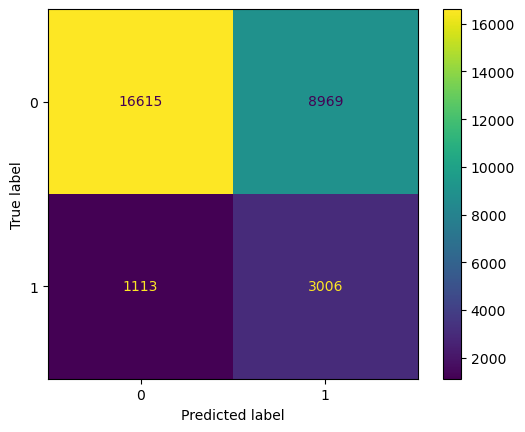

In [54]:
plot_confusion_matrix(estimator=gnb, X=tfVal, y_true=yVal)
plt.show()

# Random Forests

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [13]:
rf = RandomForestClassifier(random_state=11,n_estimators=150)

In [14]:
rf.fit(tfTrain,yTrain)

RandomForestClassifier(n_estimators=150, random_state=11)

In [15]:
jUtils.classThres(Y=yTrain,X=tfTrain,model=rf)

alt.Chart(...)

In [16]:
jUtils.classThres(Y=yVal,X=tfVal,model=rf)

alt.Chart(...)

In [ ]:
rf.estimators_[0]

In [15]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=774252441)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


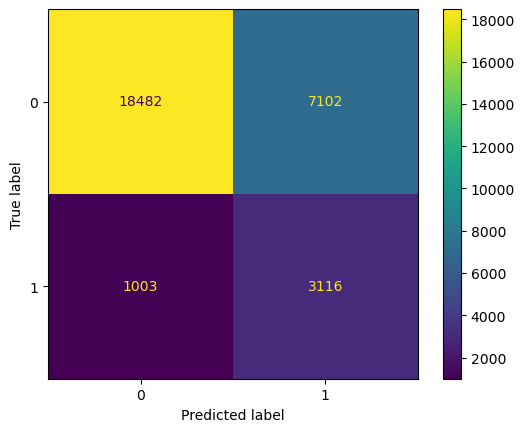

In [17]:
plot_confusion_matrix(estimator=rf, X=tfVal, y_true=yVal)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


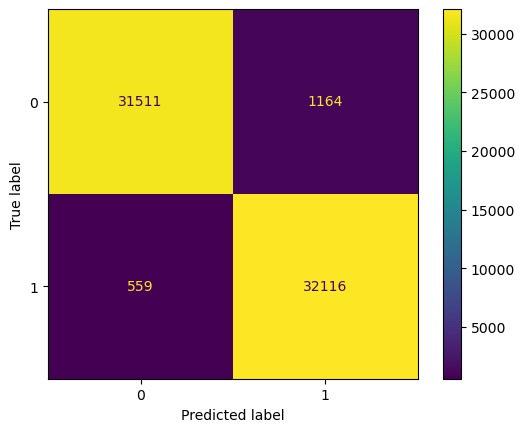

In [18]:
plot_confusion_matrix(estimator=rf, X=tfTrain, y_true=yTrain)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plot_tree(rf.estimators_[0], filled=True)
plt.show()

# SVM

In [15]:
from sklearn.svm import SVC

In [18]:
svm_model = SVC(kernel='linear')

In [19]:
svm_model.fit(tfTrain,yTrain)    

SVC(kernel='linear')

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
trainPred = svm_model.predict(tfTrain)
valPred = svm_model.predict(tfVal)

In [23]:
accuracy_score(yTrain, trainPred)

0.897

In [24]:
accuracy_score(yVal, valPred)

0.674

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


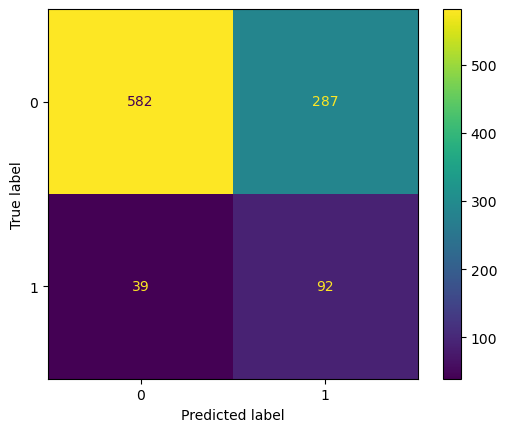

In [29]:
plot_confusion_matrix(estimator=svm_model, X=tfVal, y_true=yVal)
plt.show()

In [28]:
validation

,Unnamed: 0,id,label,selftext,cleaned,Negative,Neutral,Positive,Compound,funct,...,cleanedString,angerS,anticipation,disgust,fear,joy,sadness,surprise,trust,train
21327,73286,db4s0h,0,**Previous editions:**\n\n*(All strawpoll resu...,"['previous', 'edition', 'strawpoll', 'result',...",0.066,0.826,0.108,0.9848,0.444282,...,previous edition strawpoll result counted next...,0.160494,0.135802,0.037037,0.148148,0.098765,0.123457,0.049383,0.246914,0
26703,40236,k2p0p2,1,"Hey guys, had a thought and would love to hear...","['hey', 'guy', 'thought', 'would', 'love', 'he...",0.022,0.880,0.098,0.8577,0.578947,...,hey guy thought would love hear argument try r...,0.111111,0.166667,0.055556,0.000000,0.166667,0.055556,0.111111,0.333333,0
28202,14293,85qs4s,0,I am not american so it was all the easier to ...,"['american', 'easier', 'fail', 'keep', 'news',...",0.102,0.816,0.082,-0.1779,0.666667,...,american easier fail keep news especially elec...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
12169,64730,6vy8ze,0,Healthcare: The US has far and away the most e...,"['healthcare', 'u', 'far', 'away', 'expensive'...",0.049,0.857,0.094,0.8498,0.514970,...,healthcare u far away expensive healthcare wor...,0.080000,0.320000,0.040000,0.040000,0.120000,0.040000,0.120000,0.240000,0
6680,115230,kcxdjn,0,Is this Subreddit for Leftists criticising Lib...,"['subreddit', 'leftist', 'criticising', 'liber...",0.329,0.671,0.000,-0.6597,0.461538,...,subreddit leftist criticising liberal also rig...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14123,72519,jm5i66,0,\[Bernie Sanders lands in Trump Tower and remo...,"['trump', 'please', 'tell', 'youre', 'going', ...",0.106,0.807,0.086,-0.9481,0.475962,...,trump please tell youre going appeal humanity ...,0.139535,0.209302,0.069767,0.162791,0.093023,0.069767,0.023256,0.232558,0
25070,55003,4jz078,0,Hillary loves to say she is ahead by 3 million...,"['hillary', 'love', 'say', 'ahead', 'million',...",0.042,0.776,0.182,0.9625,0.518868,...,hillary love say ahead million vote bernie rec...,0.058824,0.176471,0.000000,0.000000,0.294118,0.058824,0.117647,0.294118,0
29332,102276,hbb9g4,0,[Welcome to the Daily Political Discussion Rou...,"['please', 'use', 'thread', 'discus', 'whateve...",0.000,0.824,0.176,0.8316,0.500000,...,please use thread discus whatever mind share n...,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0
14271,114252,4b9go9,0,http://i.imgur.com/KaMj1yW.png\n\nAlso: \n\n&g...,"['also', 'actually', 'chinese', 'culture', 'so...",0.169,0.700,0.132,-0.5729,0.456140,...,also actually chinese culture sophisticated lo...,0.133333,0.266667,0.000000,0.133333,0.133333,0.200000,0.133333,0.000000,0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


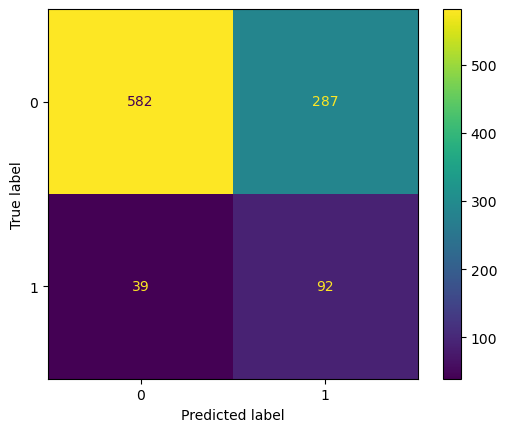

In [26]:
plot_confusion_matrix(estimator=svm_model, X=tfVal, y_true=yVal)
plt.show()

In [52]:
jUtils.classThres(Y=yTrain,X=tfTrain,model=svm_model)

AttributeError: predict_proba is not available when  probability=False